In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#read the dataset
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#printing all the unique values of the columns
for columns in data.columns:
  print("Columns : {}  Unique Values: {}" .format(columns, data[columns].unique()))

Columns : customerID  Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Columns : gender  Unique Values: ['Female' 'Male']
Columns : SeniorCitizen  Unique Values: [0 1]
Columns : Partner  Unique Values: ['Yes' 'No']
Columns : Dependents  Unique Values: ['No' 'Yes']
Columns : tenure  Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Columns : PhoneService  Unique Values: ['No' 'Yes']
Columns : MultipleLines  Unique Values: ['No phone service' 'No' 'Yes']
Columns : InternetService  Unique Values: ['DSL' 'Fiber optic' 'No']
Columns : OnlineSecurity  Unique Values: ['No' 'Yes' 'No internet service']
Columns : OnlineBackup  Unique Values: ['Yes' 'No' 'No internet service']
Columns : DeviceProtection  Unique Values: ['No' 'Yes' 'No internet service']
Column

In [ ]:
#we found that Customer ID is of no use so we drop it
data.drop(columns = "customerID", inplace = True)

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Visualisation

Text(0, 0.5, 'proportions')

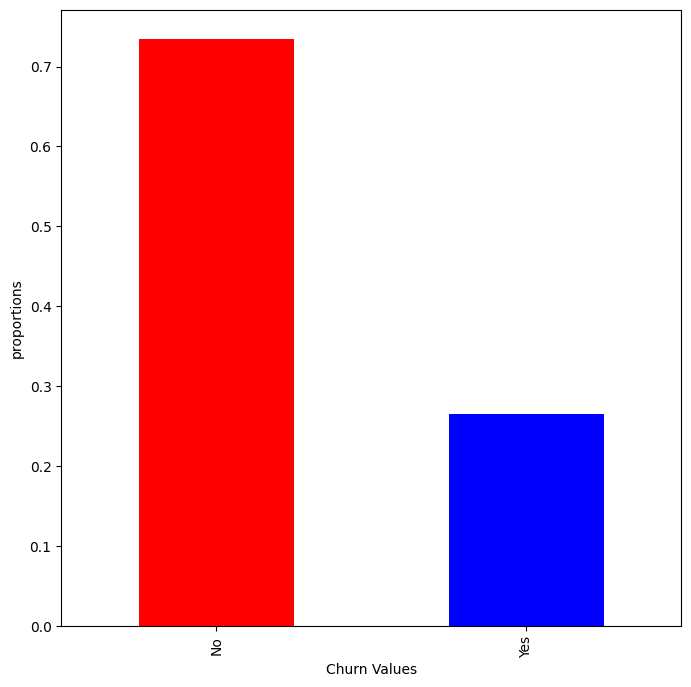

In [ ]:
#creating a plot between churn and observation
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

proportion = data['Churn'].value_counts(normalize = True)

proportion.plot(kind = 'bar', ax=ax,color = ['red',"blue"])
ax.set_xlabel('Churn Values')
ax.set_ylabel('proportions')

**Data Visualization for Demographic Attributes**

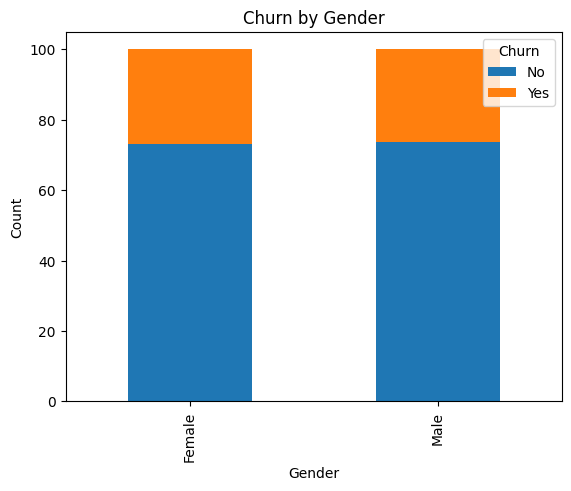

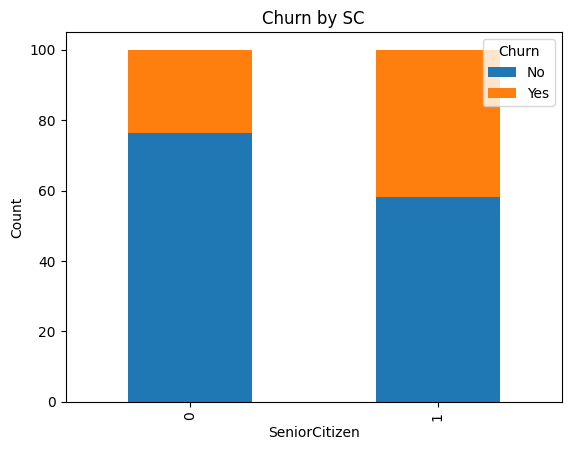

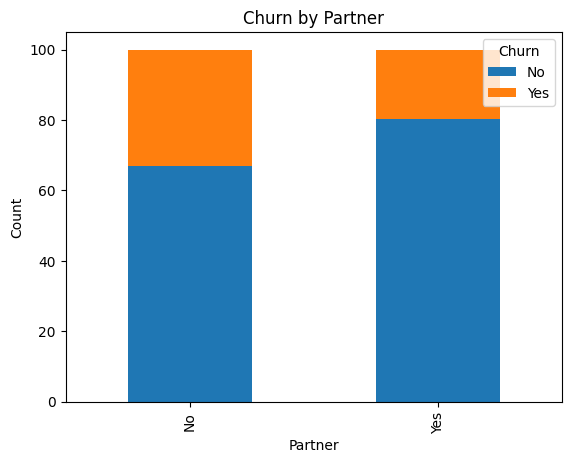

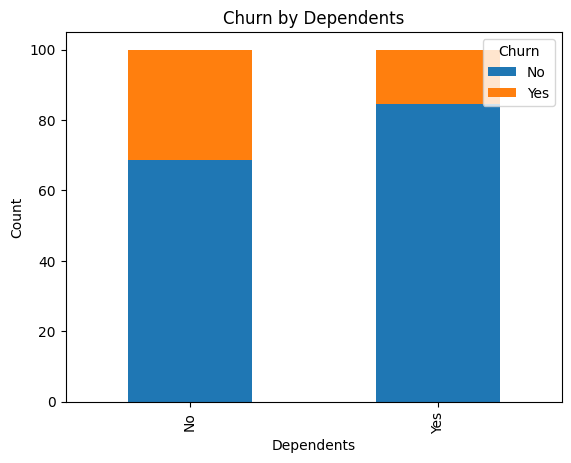

In [ ]:
# Plot of Gender vs Churn
grouped_data = pd.crosstab(data['gender'], data['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

# Plotting the stacked bar chart
fig, ax = plt.subplots()
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Customizing the chart labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Churn by Gender')

# Adding a legend
ax.legend(title='Churn', loc='upper right')

# Displaying the chart
plt.show()


# Plot SeniorCitizen vs Churn

grouped_data = pd.crosstab(data['SeniorCitizen'], data['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

# Plotting the stacked bar chart
fig, ax = plt.subplots()
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Customizing the chart labels and title
ax.set_xlabel('SeniorCitizen')
ax.set_ylabel('Count')
ax.set_title('Churn by SC')

# Adding a legend
ax.legend(title='Churn', loc='upper right')

# Displaying the chart
plt.show()


# Plot Partner vs Churn

grouped_data = pd.crosstab(data['Partner'], data['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

# Plotting the stacked bar chart
fig, ax = plt.subplots()
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Customizing the chart labels and title
ax.set_xlabel('Partner')
ax.set_ylabel('Count')
ax.set_title('Churn by Partner')

# Adding a legend
ax.legend(title='Churn', loc='upper right')

# Displaying the chart
plt.show()


# Plot Dependent vs Churn

grouped_data = pd.crosstab(data['Dependents'], data['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

# Plotting the stacked bar chart
fig, ax = plt.subplots()
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Customizing the chart labels and title
ax.set_xlabel('Dependents')
ax.set_ylabel('Count')
ax.set_title('Churn by Dependents')

# Adding a legend
ax.legend(title='Churn', loc='upper right')

# Displaying the chart
plt.show()



**Data Visualisation for categorical variable : using stacked bar charts**

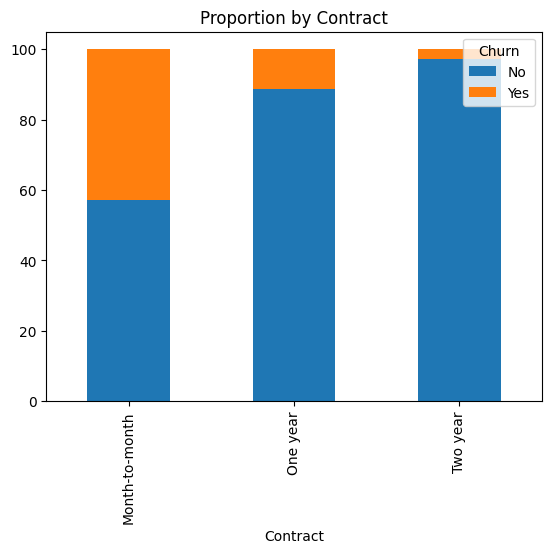

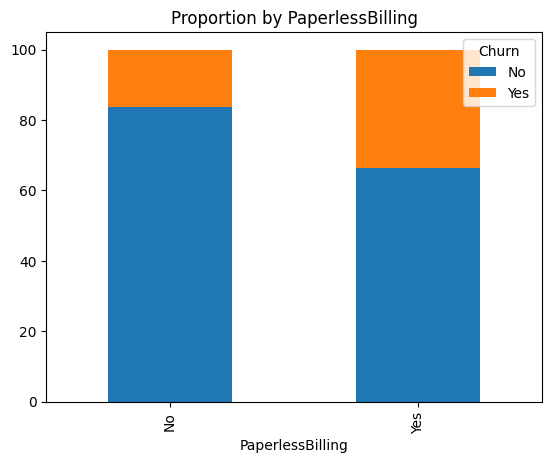

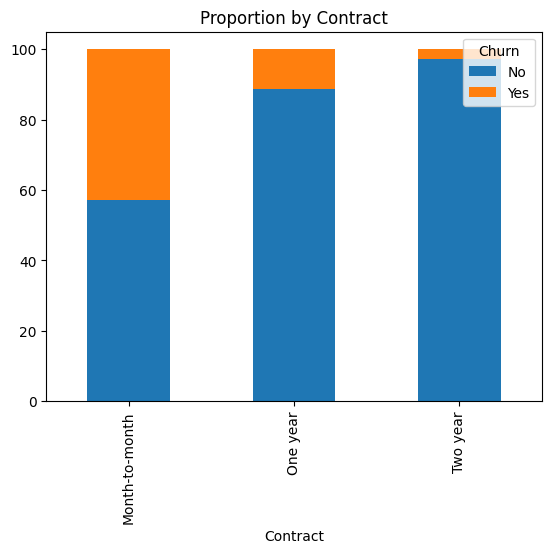

In [ ]:
#for Contract
grouped_data = pd.crosstab(data['Contract'], data['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

# Plotting the stacked bar chart
fig, ax = plt.subplots()
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Customizing the chart labels and title
ax.set_title('Proportion by Contract')

# Adding a legend
ax.legend(title='Churn', loc='upper right')

# Displaying the chart
plt.show()

#for PaperlessBilling
grouped_data = pd.crosstab(data['PaperlessBilling'], data['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

# Plotting the stacked bar chart
fig, ax = plt.subplots()
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Customizing the chart labels and title
ax.set_title('Proportion by PaperlessBilling')

# Adding a legend
ax.legend(title='Churn', loc='upper right')

# Displaying the chart
plt.show()

#for PaymentMethod
grouped_data = pd.crosstab(data['Contract'], data['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

# Plotting the stacked bar chart
fig, ax = plt.subplots()
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Customizing the chart labels and title
ax.set_title('Proportion by Contract')

# Adding a legend
ax.legend(title='Churn', loc='upper right')

# Displaying the chart
plt.show()



**Data Visualisation for Continuous Variables : using Histograms **


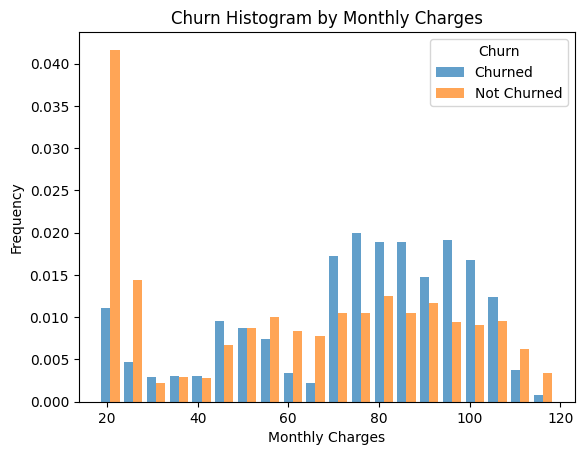

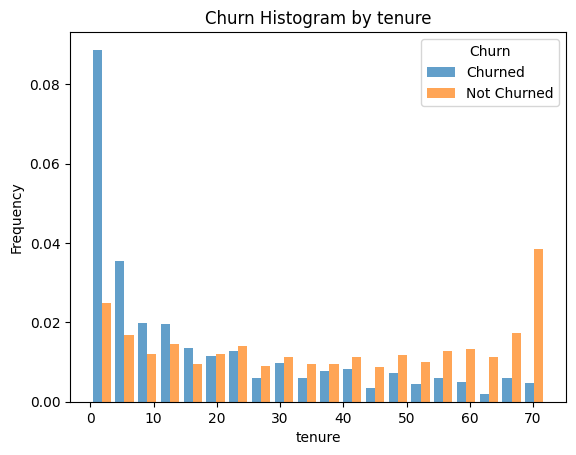

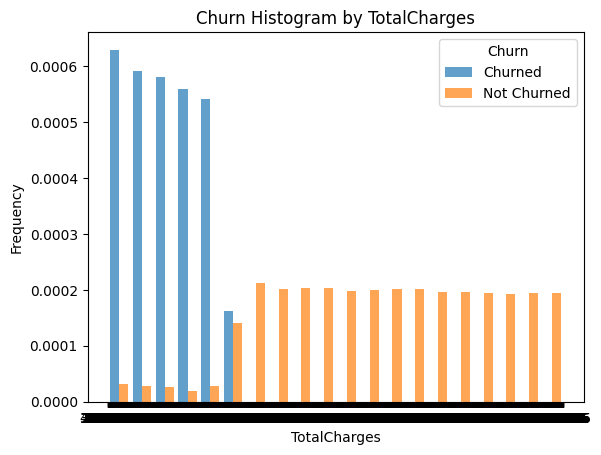

In [ ]:
#for MonthlyCharges
churned = data[data['Churn'] == 'Yes']['MonthlyCharges']
not_churned = data[data['Churn'] == 'No']['MonthlyCharges']

# Plotting the histograms
fig, ax = plt.subplots()

ax.hist([churned, not_churned],density = True, bins=20, alpha=0.7, label=['Churned', 'Not Churned'])

# Customizing the chart labels and title
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Frequency')
ax.set_title('Churn Histogram by Monthly Charges')

# Adding a legend
ax.legend(title='Churn')

# Displaying the chart
plt.show()



#for Tenure
churned = data[data['Churn'] == 'Yes']['tenure']
not_churned = data[data['Churn'] == 'No']['tenure']

# Plotting the histograms
fig, ax = plt.subplots()

ax.hist([churned, not_churned],density = True, bins=20, alpha=0.7, label=['Churned', 'Not Churned'])

# Customizing the chart labels and title
ax.set_xlabel('tenure')
ax.set_ylabel('Frequency')
ax.set_title('Churn Histogram by tenure')

# Adding a legend
ax.legend(title='Churn')

# Displaying the chart
plt.show()



#for TotalCharges
churned = data[data['Churn'] == 'Yes']['TotalCharges']
not_churned = data[data['Churn'] == 'No']['TotalCharges']

# Plotting the histograms
fig, ax = plt.subplots()

ax.hist([churned, not_churned],density = True, bins=20, alpha=0.7, label=['Churned', 'Not Churned'])

# Customizing the chart labels and title
ax.set_xlabel('TotalCharges')
ax.set_ylabel('Frequency')
ax.set_title('Churn Histogram by TotalCharges')

# Adding a legend
ax.legend(title='Churn')

# Displaying the chart
plt.show()

**Encoding**

In [ ]:
# label Encoding for all the Binary Categoricals
df= data.copy()

# label encoding (binary variables)
labels = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for column in labels:
    if column == 'gender':
        df[column] = df[column].map({'Female': 1, 'Male': 0})
    else:
        df[column] = df[column].map({'Yes': 1, 'No': 0})

In [ ]:
#One Hot Encoding for all other categoricals
others = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns = others)

**Normalization**

In [ ]:
normalize = ['tenure', 'MonthlyCharges']
for column in normalize:
        # minimum value of the column
        min_column = df[column].min()
        # maximum value of the column
        max_column = df[column].max()
        # min max scaler
        df[column] = (df[column] - min_column) / (max_column - min_column)

In [ ]:
#finding Correlation among the features
cor = df.corr()
cor

<ipython-input-17-84f308fa91b0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.011754,0.014569,0.008612,-0.004476,...,-0.005374,-0.006026,0.010487,0.003386,-0.008026,0.003695,0.016024,-0.001215,-0.000752,-0.013744
SeniorCitizen,0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.150889,-0.136213,...,0.034210,-0.182742,0.120176,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
Partner,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,-0.150448,-0.129929,...,-0.117529,0.000615,0.117412,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125
Dependents,-0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,-0.164221,0.023198,...,-0.078198,0.139812,-0.039741,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071
tenure,-0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,-0.352229,-0.323088,...,-0.252220,-0.039062,0.286111,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
PhoneService,0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.011942,0.315431,...,-0.112254,0.172209,-0.032959,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319
PaperlessBilling,0.011754,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.191825,-0.151864,...,0.059488,-0.321013,0.211716,0.169096,-0.051391,-0.147889,-0.016332,-0.013589,0.208865,-0.205398
MonthlyCharges,0.014569,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.193356,-0.338314,...,0.018075,-0.763557,0.627429,0.060165,0.004904,-0.074681,0.042812,0.030550,0.271625,-0.377437
Churn,0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,1.000000,-0.032569,...,0.130845,-0.227890,0.061382,0.405103,-0.177820,-0.302253,-0.117937,-0.134302,0.301919,-0.091683
MultipleLines_No,-0.004476,-0.136213,-0.129929,0.023198,-0.323088,0.315431,-0.151864,-0.338314,-0.032569,1.000000,...,0.013076,0.310046,-0.275256,0.086740,0.002098,-0.102937,-0.070178,-0.063921,-0.080836,0.222605


In [ ]:
df.drop(columns = 'TotalCharges' , inplace = True)

**Split the data in training and test splits**


In [ ]:
# Selecting independent variables
X = df.drop(columns = 'Churn')

# Selecting Dependent Variables
Y = df.loc[:,'Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state= 20)

In [ ]:
print("Train\n",X_train.shape)
print("Test\n",X_test.shape)

Train
 (4930, 39)
Test
 (2113, 39)


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,1,0.115423,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.472222,1,0,0.385075,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.027778,1,1,0.354229,1,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.625000,0,0,0.239303,0,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.027778,1,1,0.521891,1,1,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   float64
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   Churn                                    7043 non-null   int64  
 9   MultipleLines_No                         7043 non-null   uint8  
 10  MultipleLines_No phone service           7043 no

**Linear Regression**

In [ ]:
from numpy.random import seed
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, Y_train).predict(X_test)

prediction = model.predict(X_test)

accuracy = r2_score(Y_test, prediction)

print(accuracy)

0.24553386829017543


**Polynomial** **Regression**

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, Y_train)
y_pred = model.predict(X_test_poly)

accuracy = r2_score(Y_test,y_pred)
print(accuracy)

0.29109051800604013


**Logistic** **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, Y_train).predict(X_test)
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print(accuracy)

0.8163748225272125


***ANN Model*** : 3 layer model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(units = 12, input_shape=(39,), activation = 'relu'),
    Dense(units = 8, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, epochs = 150)

Epoch 1/150
155/155 [==============================] - 2s 2ms/step - loss: 0.5257 - accuracy: 0.7268
Epoch 2/150
155/155 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.7763
Epoch 3/150
155/155 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.7872
Epoch 4/150
155/155 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.7927
Epoch 5/150
155/155 [==============================] - 0s 3ms/step - loss: 0.4283 - accuracy: 0.7917
Epoch 6/150
155/155 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.7921
Epoch 7/150
155/155 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.7915
Epoch 8/150
155/155 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.7968
Epoch 9/150
155/155 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.7949
Epoch 10/150
155/155 [==============================] - 0s 2ms/step - loss: 0.4197 - accura

In [ ]:
model.evaluate(X_test, Y_test)

67/67 [==============================] - 3s 10ms/step - loss: 0.4210 - accuracy: 0.8050


[0.42095714807510376, 0.8050165772438049]

In [ ]:
_, accuracy = model.evaluate(X_test,Y_test)
print('Accuracy : %.2f'%(accuracy*100))

67/67 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8050
Accuracy : 80.50


**ANN Model** : 4 layer model

In [ ]:
model2 = Sequential([
    Dense(units = 19, input_shape=(39,), activation = 'relu'),
    Dense(units = 15, activation = 'relu'),
    Dense(units = 10, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
])

In [ ]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model2.fit(X_train, Y_train, epochs = 150)

Epoch 1/150
155/155 [==============================] - 3s 2ms/step - loss: 0.6849 - accuracy: 0.6394
Epoch 2/150
155/155 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.7696
Epoch 3/150
155/155 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.7838
Epoch 4/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.7915
Epoch 5/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5594 - accuracy: 0.7909
Epoch 6/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.7927
Epoch 7/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5258 - accuracy: 0.7961
Epoch 8/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.7953
Epoch 9/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.7966
Epoch 10/150
155/155 [==============================] - 0s 2ms/step - loss: 0.4924 - accura

In [ ]:
_, accuracy = model.evaluate(X_test,Y_test)
print('Accuracy : %.2f'%(accuracy*100))

67/67 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.7979
Accuracy : 79.79


**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)

0.8135352579271179


**Prediction Scores for all the methods**
1. Linear Regression : 0.2455
2. Polynomial Regression (Degree = 2): 0.2910
3. Logistic Regression : 0.8163
4. 3 Layered ANN Model : 80.50
5. 4 Layered ANN Model : 79.79
6. Gradient Boosting : 0.8135


**Therefore the best model for this dataset :** *Logistic Regression*

---



---


*Gradient Boosting is also of almost same accuracy*